<a href="https://colab.research.google.com/github/manojtummala/Sparks-Foundation-Internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>**GRIP- The Sparks Foundation**</center> 

## Data Science and Buisness Analytics Internship


**Linear Regression with Python Scikit learn - Prediction using Supervised ML**

**Author: Manoj Tummala**


#### Task-1: Predict the percentage of an student based on the no. of study hours.(Simple Linear Regression)
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Importing Required Libraries**

In [8]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline 
print('Libraries imported successfully')

Libraries imported successfully


**Reading Data from given link**

In [9]:
#Reading data from given link
url = 'http://bit.ly/w-data'
task_data = pd.read_csv(url)

print('Data imported succesfully') 

Data imported succesfully


**Checking Data**

In [10]:
task_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
#checking for any missing values
task_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
task_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
task_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
#checking the correlation between hours and scores

task_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*This shows that it has higher correlation between hours and scores.*


**Data Visualization**

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

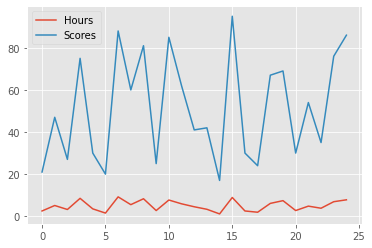

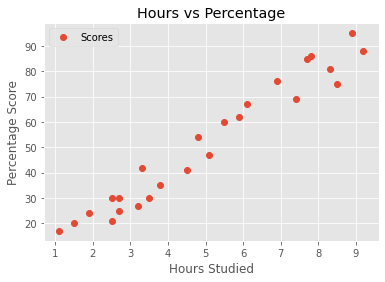

In [15]:
#Plotting the distribution of scores with line plot and scatter plot
plt.style.use('ggplot')
task_data.plot(kind = 'line')
task_data.plot(x ='Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

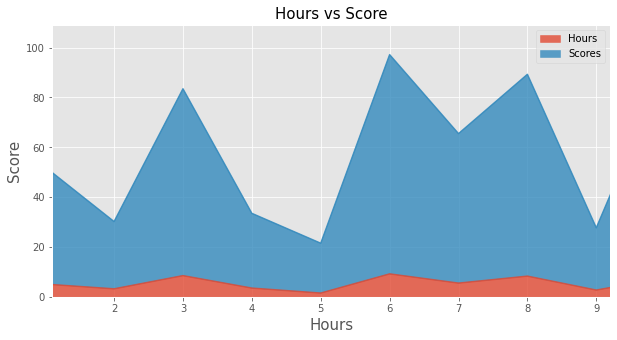

In [16]:
#Let's visualize it with area plot

xmin=min(task_data.Hours)
xmax=max(task_data.Hours)
task_data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

*Seeing this we can understand that there is a positive linear relation between the number of hours studied and the percentage if the score.*
 
So we came to know that we can solve this probem using linear regression


**Modelling Data and Training the Algorithm**

*The next steip is to divide the data into "attributes"(inputs) and "labels"(outputs).*

In [29]:
# we can either use .iloc and slicing it... 
# x=np.asanyarray(task_data['Hours'])
# y=np.asanyarray(task_data['Scores'])

# or we can do like this...

x = task_data.iloc[:, :-1].values  
y = task_data.iloc[:, 1].values  

*next step is to just split the data into training and test sets using Scikit built in train_test_split() method.*

In [50]:

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

*now as the the data is distributed into training and test sets.. we will train the algorithm*

In [51]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train_x, train_y) 

print('Training completed\n')
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)


Training completed

Coefficients:  [9.94061514]
Intercept:  1.5079104828268939


*plotting the line fit for the data in single regression*

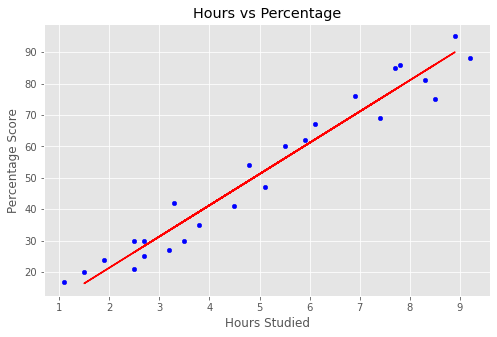

In [45]:
task_data.plot(kind='scatter',x='Hours',y='Scores',figsize=(8,5),color='b')
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_,color='r')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

*Here the red line is the best fit line for the given data in single regression.*

**Predicting the score**

*Now as the algorithm is trained and complete.. we are ready to make some predictions...*

In [52]:
hours=9.25
predicted_score=regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

No. of hours = 9.25
predicted Score = 93.45860055685799


**Evaluaing the model**


*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, I have chosen the mean absolute error and r2 to see the accuracy*

In [53]:
from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score: %.2f" % r2_score(y_pred, test_y) )

Mean Absolute Error : 4.877039354964476
R2-score: 0.98


Here:

Mean absolute error: *It is the mean of all absolute errors*

r2-score: *It does'nt describe errors but is a metric for accuracy of the model*

*Higher the value of r2... higher is the accuracy of the model... **'1'** being the highest* 

In [54]:
# To show you the accuracy... Comparing he actualdata values to the predicted data values...

task_data2 =pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
task_data2

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


# <center>***The End Of TASK-1***</center>